Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

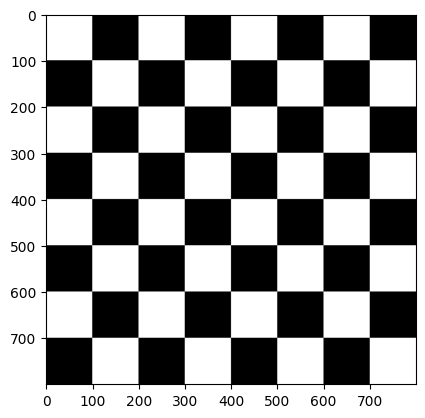

In [5]:
gris_img = np.zeros((800,800,1), dtype = np.uint8)
#Modifica un par de zonas rectangulares de la imagen
height=100
width=100

for i in range(8):
    for j in range(8):
        if (i % 2 == 0 and j % 2 == 0) or (i % 2 != 0 and j % 2 != 0):
            x_start = i * width
            x_end = x_start + width
            y_start = j * height
            y_end = y_start + height
            gris_img[x_start:x_end, y_start:y_end, 0] = 255
            
        

plt.imshow(gris_img, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

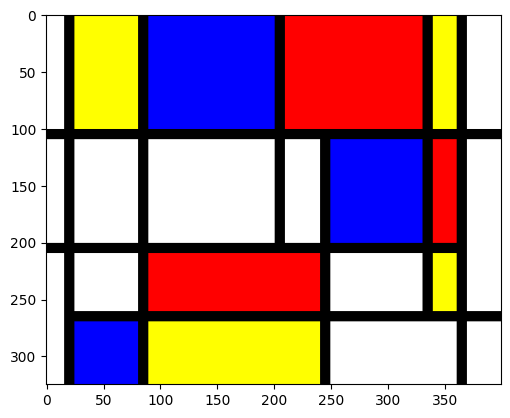

In [6]:
#Crea una imagen con tres planos
color_img = np.zeros((325,400,3), dtype = np.uint8)

# Primera fila
cv2.rectangle(color_img,(0,0),(15,100),(255,255,255),-1)
cv2.rectangle(color_img,(25,0),(80,100),(255,255,0),-1)
cv2.rectangle(color_img,(90,0),(200,100),(0,0,255),-1)
cv2.rectangle(color_img,(210,0),(330,100),(255,0,0),-1)
cv2.rectangle(color_img,(340,0),(360,100),(255,255,0),-1)
cv2.rectangle(color_img,(370,0),(400,100),(255,255,255),-1)

# Segunda filla
cv2.rectangle(color_img,(0,110),(15,200),(255,255,255),-1)
cv2.rectangle(color_img,(25,110),(80,200),(255,255,255),-1)
cv2.rectangle(color_img,(90,110),(200,200),(255,255,255),-1)
cv2.rectangle(color_img,(210,110),(240,200),(255,255,255),-1)
cv2.rectangle(color_img,(250,110),(330,200),(0,0,255),-1)
cv2.rectangle(color_img,(340,110),(360,200),(255,0,0),-1)

# Tercera fila
cv2.rectangle(color_img,(25,210),(80,260),(255,255,255),-1)
cv2.rectangle(color_img,(90,210),(240,260),(255,0,0),-1)
cv2.rectangle(color_img,(250,210),(330,260),(255,255,255),-1)
cv2.rectangle(color_img,(340,210),(360,260),(255,255,0),-1)

# Cuarta fila
cv2.rectangle(color_img,(25,270),(80,350),(0,0,255),-1)
cv2.rectangle(color_img,(90,270),(240,350),(255,255,0),-1)
cv2.rectangle(color_img,(250,270),(360,350),(255,255,255),-1)
cv2.rectangle(color_img,(370,270),(400,350),(255,255,255),-1)

# Rectangulos en varias filas
# 2 y 3
cv2.rectangle(color_img,(370,110),(400,260),(255,255,255),-1)
# 3 y 4
cv2.rectangle(color_img,(0,210),(15,350),(255,255,255),-1)

#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [ ]:
# Captura desde la cámara
vid = cv2.VideoCapture(0)

while True:
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Modificamos el canal azul
        frame[:,:,0] = frame[:,:,2]  # cambiar el valor del canal azul al que tiene el rojo


        cv2.imshow('WebCam', frame)
    if cv2.waitKey(20) == 27:  # ESC para salir
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [9]:
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Fuerzo a mitad de resolución para ocupar menos pantalla
w = int(w/2)
h = int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)

#En Mac no reacciona a estos comandos 
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h) 


while True:
    ret, frameIN = vid.read()
    frame = cv2.resize(frameIN, (w, h), cv2.INTER_NEAREST)

    if ret:
        # Pasamos el frame a escala de grises
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Buscamos el pixel más oscuro y el más claro
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray)

        # Dibujamos círculos en esas posiciones
        cv2.circle(frame, minLoc, 5, (255, 0, 0), 2) # Azul en pixel más oscuro
        cv2.circle(frame, maxLoc, 5, (0, 0, 255), 2) # Rojo en pixel más claro

        # Mostrar el resultado
        cv2.imshow('Cam', frame)

    # Salir con ESC
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [8]:
vid = cv2.VideoCapture(0)

# Obtenemos las dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Reduzco resolución: cada caja será w/6 por h/3 → 3 filas x 6 columnas
w = int(w/6)
h = int(h/3)

# (Opcional, normalmente no funciona en muchas webcams)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Lienzo de 3 filas x 6 columnas (18 cajas)
collage = np.zeros((h*3, w*6, 3), dtype=np.uint8)

# Color boxes (izquierda 3x3)
box_00 = collage[0:h, 0:w]
box_01 = collage[0:h, w:2*w]
box_02 = collage[0:h, 2*w:3*w]
box_10 = collage[h:2*h, 0:w]
box_11 = collage[h:2*h, w:2*w]
box_12 = collage[h:2*h, 2*w:3*w]
box_20 = collage[2*h:3*h, 0:w]
box_21 = collage[2*h:3*h, w:2*w]
box_22 = collage[2*h:3*h, 2*w:3*w]

# Gray boxes (derecha 3x3)
box_03 = collage[0:h, 3*w:4*w]
box_04 = collage[0:h, 4*w:5*w]
box_05 = collage[0:h, 5*w:6*w]
box_13 = collage[h:2*h, 3*w:4*w]
box_14 = collage[h:2*h, 4*w:5*w]
box_15 = collage[h:2*h, 5*w:6*w]
box_23 = collage[2*h:3*h, 3*w:4*w]
box_24 = collage[2*h:3*h, 4*w:5*w]
box_25 = collage[2*h:3*h, 5*w:6*w]

while True:
    ret, frame = vid.read()
    if not ret:
        break

    # Redimensionamos frame a (w, h)
    frame = cv2.resize(frame, (w, h))

    # Separamos canales del frame original
    b = frame[:,:,0]
    g = frame[:,:,1]
    r = frame[:,:,2]

    # Frame en escala de grises (convertido a 3 canales)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # --- Color boxes ---
    box_00[:,:,0], box_00[:,:,1], box_00[:,:,2] = b, g, 255 - r
    box_01[:,:,0], box_01[:,:,1], box_01[:,:,2] = b, 255 - g, r
    box_02[:,:,0], box_02[:,:,1], box_02[:,:,2] = 255 - b, g, r
    box_10[:,:,0], box_10[:,:,1], box_10[:,:,2] = b, g, 170 - r
    box_11[:,:,0], box_11[:,:,1], box_11[:,:,2] = b, 170 - g, r
    box_12[:,:,0], box_12[:,:,1], box_12[:,:,2] = 170 - b, g, r
    box_20[:,:,0], box_20[:,:,1], box_20[:,:,2] = b, g, 85 - r
    box_21[:,:,0], box_21[:,:,1], box_21[:,:,2] = b, 85 - g, r
    box_22[:,:,0], box_22[:,:,1], box_22[:,:,2] = 85 - b, g, r

    # --- Gray boxes ---
    box_03[:,:,:] = gray
    box_04[:,:,:] = 255 - gray
    box_05[:,:,:] = cv2.convertScaleAbs(gray, alpha=0.66, beta=0)
    box_13[:,:,:] = cv2.convertScaleAbs(gray, alpha=0.66, beta=50)
    box_14[:,:,:] = cv2.convertScaleAbs(gray, alpha=0.5, beta=100)
    box_15[:,:,:] = cv2.convertScaleAbs(gray, alpha=0.33, beta=150)
    box_23[:,:,:] = cv2.convertScaleAbs(gray, alpha=1.2, beta=0)
    box_24[:,:,:] = cv2.convertScaleAbs(gray, alpha=1.2, beta=50)
    box_25[:,:,:] = cv2.convertScaleAbs(gray, alpha=1.2, beta=100)

    # Mostrar composición
    cv2.imshow('Cam', collage)

    if cv2.waitKey(20) == 27:  # Esc para salir
        break

vid.release()
cv2.destroyAllWindows()
